# Autores
- Javier Abella
- Victor Teixidó
- Tomás Treviño
- You Wu

In [ ]:
!pip install dtreeviz==1.4.1 --upgrade --user --quiet

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import set_config, tree
import warnings
set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR

from dtreeviz.trees import dtreeviz

# QUIERO ANDAR EN BICICLETA

En uno de los trabajos anteriores trabajamos con este mismo conjunto de datos de Bike Sharing con modelos lineales, notastamos la falta de linealidad en los datos y no quedamos totalmente satisfechos con los resultados.

El conjunto de datos de Bike Sharing del repositorio de conjuntos de datos de UCI recopila estadísticas agregadas del uso de bicicletas con información adicional relevante. 

El objetivo de este problema es predecir cuántas bicicletas se usarán diariamente.

In [ ]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2

url = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip").read()
file = ZipFile(BytesIO(url))
day_csv = file.open("day.csv")

bikes_data = pd.read_csv(day_csv)
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


# Apartado a

El primer paso es preprocesar y preparar los datos antes de ajustar cualquier modelo. Hay algunas variables que no son útiles para el problema o que no tiene sentido usar, estas las eliminaremos del conjunto de datos. Divididremos los datos en conjuntos de entrenamiento y test (60%/40%). Debido a que trabajaremos con modelos basados en árboles de decisión, los datos no necesitan ninguna normalización.



## Visualización de los datos

In [ ]:
bikes_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.166,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.497,1.111,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.501,0.5,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.52,3.452,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.029,0.167,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997,2.005,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.684,0.465,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395,0.545,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495,0.183,0.059,0.337,0.498,0.655,0.862


### Variables numéricas

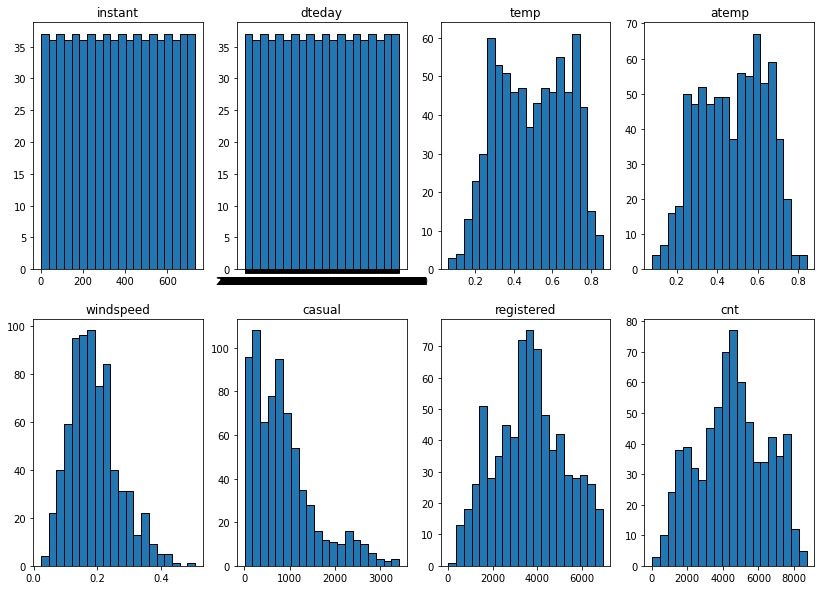

In [ ]:
ig,ax = plt.subplots(2,4,figsize=(14,10))

ax[0][0].hist(bikes_data['instant'], bins=20, edgecolor='black');
ax[0][0].set_title('instant');
ax[0][1].hist(bikes_data['dteday'], bins=20, edgecolor='black');
ax[0][1].set_title('dteday');
ax[0][2].hist(bikes_data['temp'], bins=20, edgecolor='black');
ax[0][2].set_title('temp');
ax[0][3].hist(bikes_data['atemp'], bins=20, edgecolor='black');
ax[0][3].set_title('atemp');

ax[1][0].hist(bikes_data['windspeed'], bins=20, edgecolor='black');
ax[1][0].set_title('windspeed');
ax[1][1].hist(bikes_data['casual'], bins=20, edgecolor='black');
ax[1][1].set_title('casual');
ax[1][2].hist(bikes_data['registered'], bins=20, edgecolor='black');
ax[1][2].set_title('registered');
ax[1][3].hist(bikes_data['cnt'], bins=20, edgecolor='black');
ax[1][3].set_title('cnt');

Se puede ver como las variables *instant* y *dteday*, no nos van a proporcionar información útil, así que las eliminaremos del conjunto de datos durante el preproceso. Dentro de las variables numéricas hay variables que tienen su rango entre 0 y 1 ya que definen una medida porcentual, estas variables son *temp*, *atemp*, *hum* y *windspeed*.

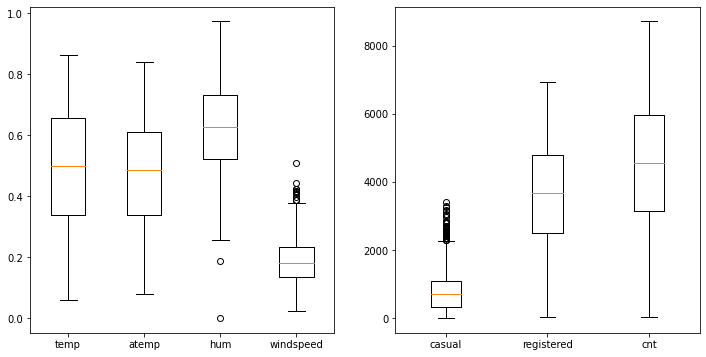

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

boxplot_data = [bikes_data['temp'],bikes_data['atemp'],bikes_data['hum'],bikes_data['windspeed']]
ax[0].boxplot(boxplot_data, labels=['temp','atemp','hum','windspeed']);

boxplot_data = [bikes_data['casual'],bikes_data['registered'],bikes_data['cnt']]
ax[1].boxplot(boxplot_data, labels=['casual','registered','cnt']);

En este conjunto de datos, tal y como vemos, no será necesario ningún tipo de tratamiento de outliers tanto inferiores como superiores.

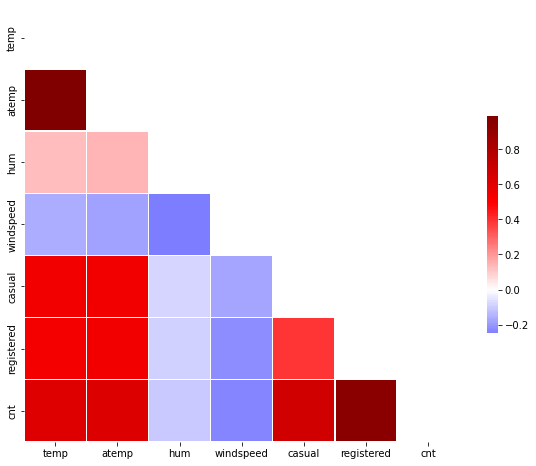

In [ ]:
numerical_columns = ['temp','atemp','hum','windspeed','casual','registered','cnt']

corr = bikes_data[numerical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

En esta figura podemos ver la correlación entre los distintos atributos númericos. Como parece lógico, el número de usuarios, tanto registrados como casuales, tiene una alta correlación con la variable objetivo y es que estos atributos sumados, son igual a la variable objetivo. Estos dos atributos los eliminaremos durante el preprocessing por ese mismo motivo. Por otra parte, vemos como los distintos parámetros de medida de la temperatura parecen tener una significativa correlación con el número de bicicletas usadas.

### Variables categóricas



3    188
2    184
1    181
4    178
Name: season, dtype: int64


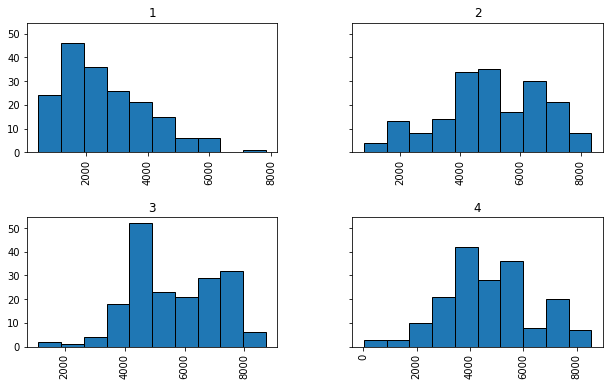

In [ ]:
print(bikes_data['season'].value_counts())

bikes_data.hist(column='cnt',by='season',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

Así a simple vista, vemos como en Primavera (2) y en Verano (3) parece ser que se usan más bicicletas. Aún así, no parece haber una gran diferencia entre épocas del año. Modificaremos los valores con one-hot enconding para poder ajustar los distintos modelos. One-hot encoding porque no existe ningun tipo de prioridad u orden entre las distintas estaciones del año.

1    366
0    365
Name: yr, dtype: int64


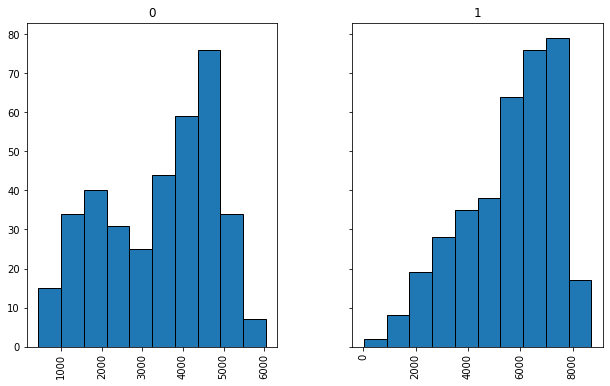

In [ ]:
print(bikes_data['yr'].value_counts())

bikes_data.hist(column='cnt',by='yr',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

Entre los años 2011 y 2012 no parece haber una gran diferencia entre el uso de bicicletas. 

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64


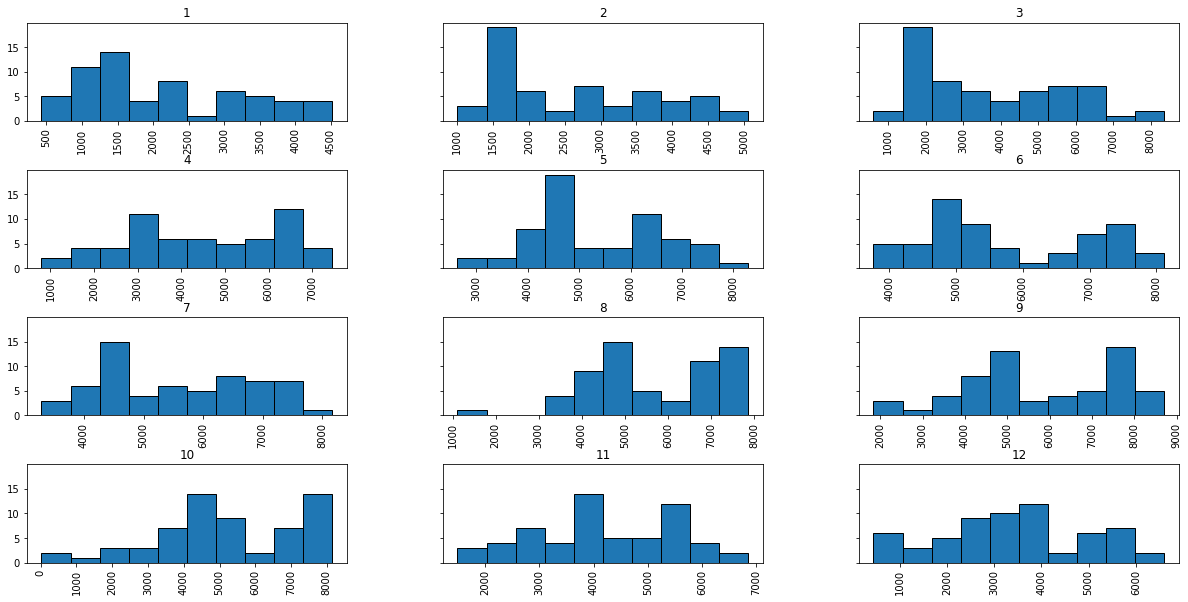

In [ ]:
print(bikes_data['weekday'].value_counts())
bikes_data.hist(column='cnt',by='mnth',bins=10, sharey=True, figsize=(20,10), edgecolor='black');

Parece haber una tendencia en los meses de Verano y Primavera en la que se usan más bicicletas en comparación a otros meses del año probablemente debido al buen tiempo, tal y como veíamos antes. Modificaremos los valores con one-hot enconding para poder ajustar los distintos modelos. One-hot encoding porque no existe ningun tipo de prioridad u orden entre los distintos meses del año.

0    710
1     21
Name: holiday, dtype: int64


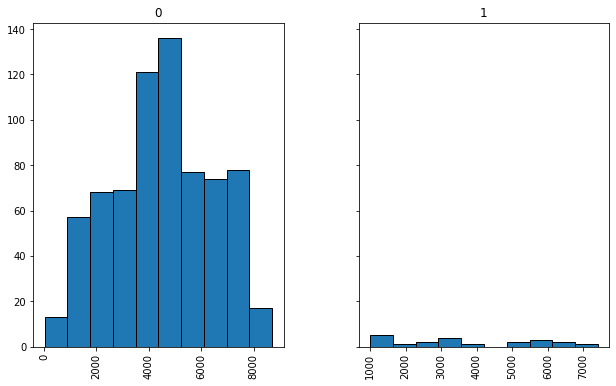

In [ ]:
print(bikes_data['holiday'].value_counts())

bikes_data.hist(column='cnt',by='holiday',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

A posteriori, modificaremos el nombre de esta variable para que sea más representativa. Claramente vemos como en festivo se utilizan muchas menos bicicletas.

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64


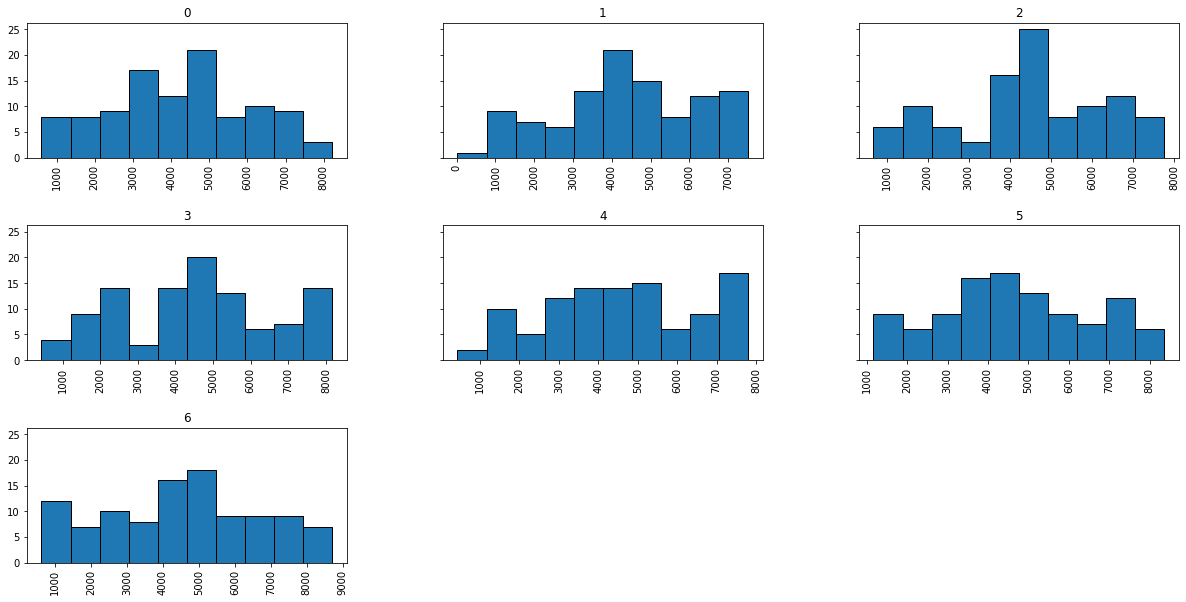

In [ ]:
print(bikes_data['weekday'].value_counts())

bikes_data.hist(column='cnt',by='weekday',bins=10, sharey=True, figsize=(20,10), edgecolor='black');

Parece haber un ligero mayor uso de bicicletas a principio de semana. Utilizaremos estos valores a la hora de ajustar los modelos.

1    500
0    231
Name: workingday, dtype: int64


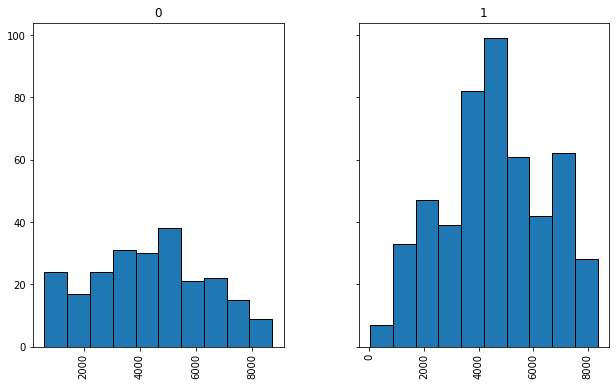

In [ ]:
print(bikes_data['workingday'].value_counts())

bikes_data.hist(column='cnt',by='workingday',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

A posteriori, modificaremos el nombre de esta variable para que sea más representativa. Así a simple vista, vemos como cuando es dia laborable, el uso de bicicletas incrementa considerablemente.

1    463
2    247
3     21
Name: weathersit, dtype: int64


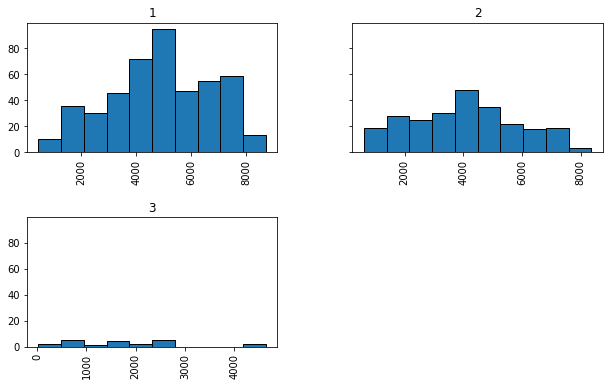

In [ ]:
print(bikes_data['weathersit'].value_counts())

bikes_data.hist(column='cnt',by='weathersit',bins=10, sharey=True, figsize=(10,6), edgecolor='black');

Así a simple vista, vemos como en hay leve lluvia o nieve (3) el uso de bicicletas es practicamente nulo. Modificaremos los valores con one-hot enconding para poder ajustar los distintos modelos. One-hot encoding porque no existe ningun tipo de prioridad u orden entre los distintos climas.

## Partición de datos

Dividimos los datos en entrenamiento (60%) y test (40%)

In [ ]:
from sklearn.model_selection import train_test_split

X = bikes_data.loc[:, bikes_data.columns != 'cnt']
y = bikes_data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=33)

## Preprocessing

In [ ]:
def minimum_preprocessing(X, y):
  print('Tamaño original:{}'.format(X.shape))

  # rename some variables
  X.rename({'yr': 'year', 'mnth': 'month', 'holiday': 'is_holiday', 'workingday': 'is_workingday',
                   'weathersit': 'weather_situation', 'windspeed': 'wind_speed'},
                  axis=1, inplace=True)
  
  # remove instant, dteday, month and season columns
  X.drop(columns=['instant','dteday','casual','registered'], inplace=True)

  # remove possible missing values
  X = X.dropna()
  y = y[X.index]
  print('Nuevo tamaño:{}'.format(X.shape))
  return X, y

In [ ]:
X_train, y_train = minimum_preprocessing(X_train,y_train)
X_test, y_test = minimum_preprocessing(X_test,y_test)

Tamaño original:(438, 15)
Nuevo tamaño:(438, 11)
Tamaño original:(293, 15)
Nuevo tamaño:(293, 11)


# Apartado b

Vamos a ajustar un árbol de regresión explorando sus hiperparámetros adecuadamente. Regristraremos la puntuación de la validación cruzada para el mejor modelo y la calidad del modelo con los datos del test.

In [ ]:
from sklearn.model_selection import cross_val_score
cv = 10

def save_results(clf, nclf, X, y, df):
    df.loc[nclf,'test_score'] = clf.score(X, y)
    df.loc[nclf,'cross_val_score'] = clf.best_score_
    return df

results_df = pd.DataFrame()

In [ ]:
param = {
    'criterion':['mse', 'entropy'], 
    'max_depth':[None, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf':[1,2,3,5,10], 
    'splitter': ['best', 'random'], 
    'max_leaf_nodes':[5, 10, 20, 30]}

dt =  DecisionTreeRegressor(random_state = 0)
dt_gs =  GridSearchCV(dt, param, cv=cv, n_jobs=-1, refit=True)
dt_gs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(dt_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
33,"{'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'random'}",0.818,1
353,"{'criterion': 'mse', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'random'}",0.817,2
313,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'random'}",0.817,3
357,"{'criterion': 'mse', 'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'splitter': 'random'}",0.816,4
37,"{'criterion': 'mse', 'max_depth': None, 'max_leaf_nodes': 30, 'min_samples_leaf': 5, 'splitter': 'random'}",0.816,4


Podemos ver como los resultados son relativamente buenos, y es notable que apenas hay diferencia entre los primeros 5 resultados, el mejor de estos tiene un acierto de 0.818. El mejor de estos lo hemos obtenido con *mse* como valor de *criterion*, la máxima profundidad definida como *None*, el *max_leaf_nodes* igual a 30, el valor de *min_samples_leaf* igual a 2 y por último, cogiendo *random* como parámetro de *splitter*.

Vamos a ir registrando la puntuación de la validación cruzada para el mejor modelo y la calidad del modelo con los datos del test.

In [ ]:
results_df = save_results(dt_gs, 'Regression tree', X_test, y_test, results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Regression tree,0.751,0.818


El acierto que hemos obtenido en el conjunto test tiene un acierto que más o menos está bien, aunque tiene un amplio margen de mejora. Por otro lado, la varianza explicada también tiene un valor razonablemente bueno pero posiblemente mejorable con mejores modelos.

Vamos a representar el árbol del modelo final utilizando la librería viztree y explicaremos cómo el árbol toma las decisiones a partir de los atributos en la parte superior del árbol.

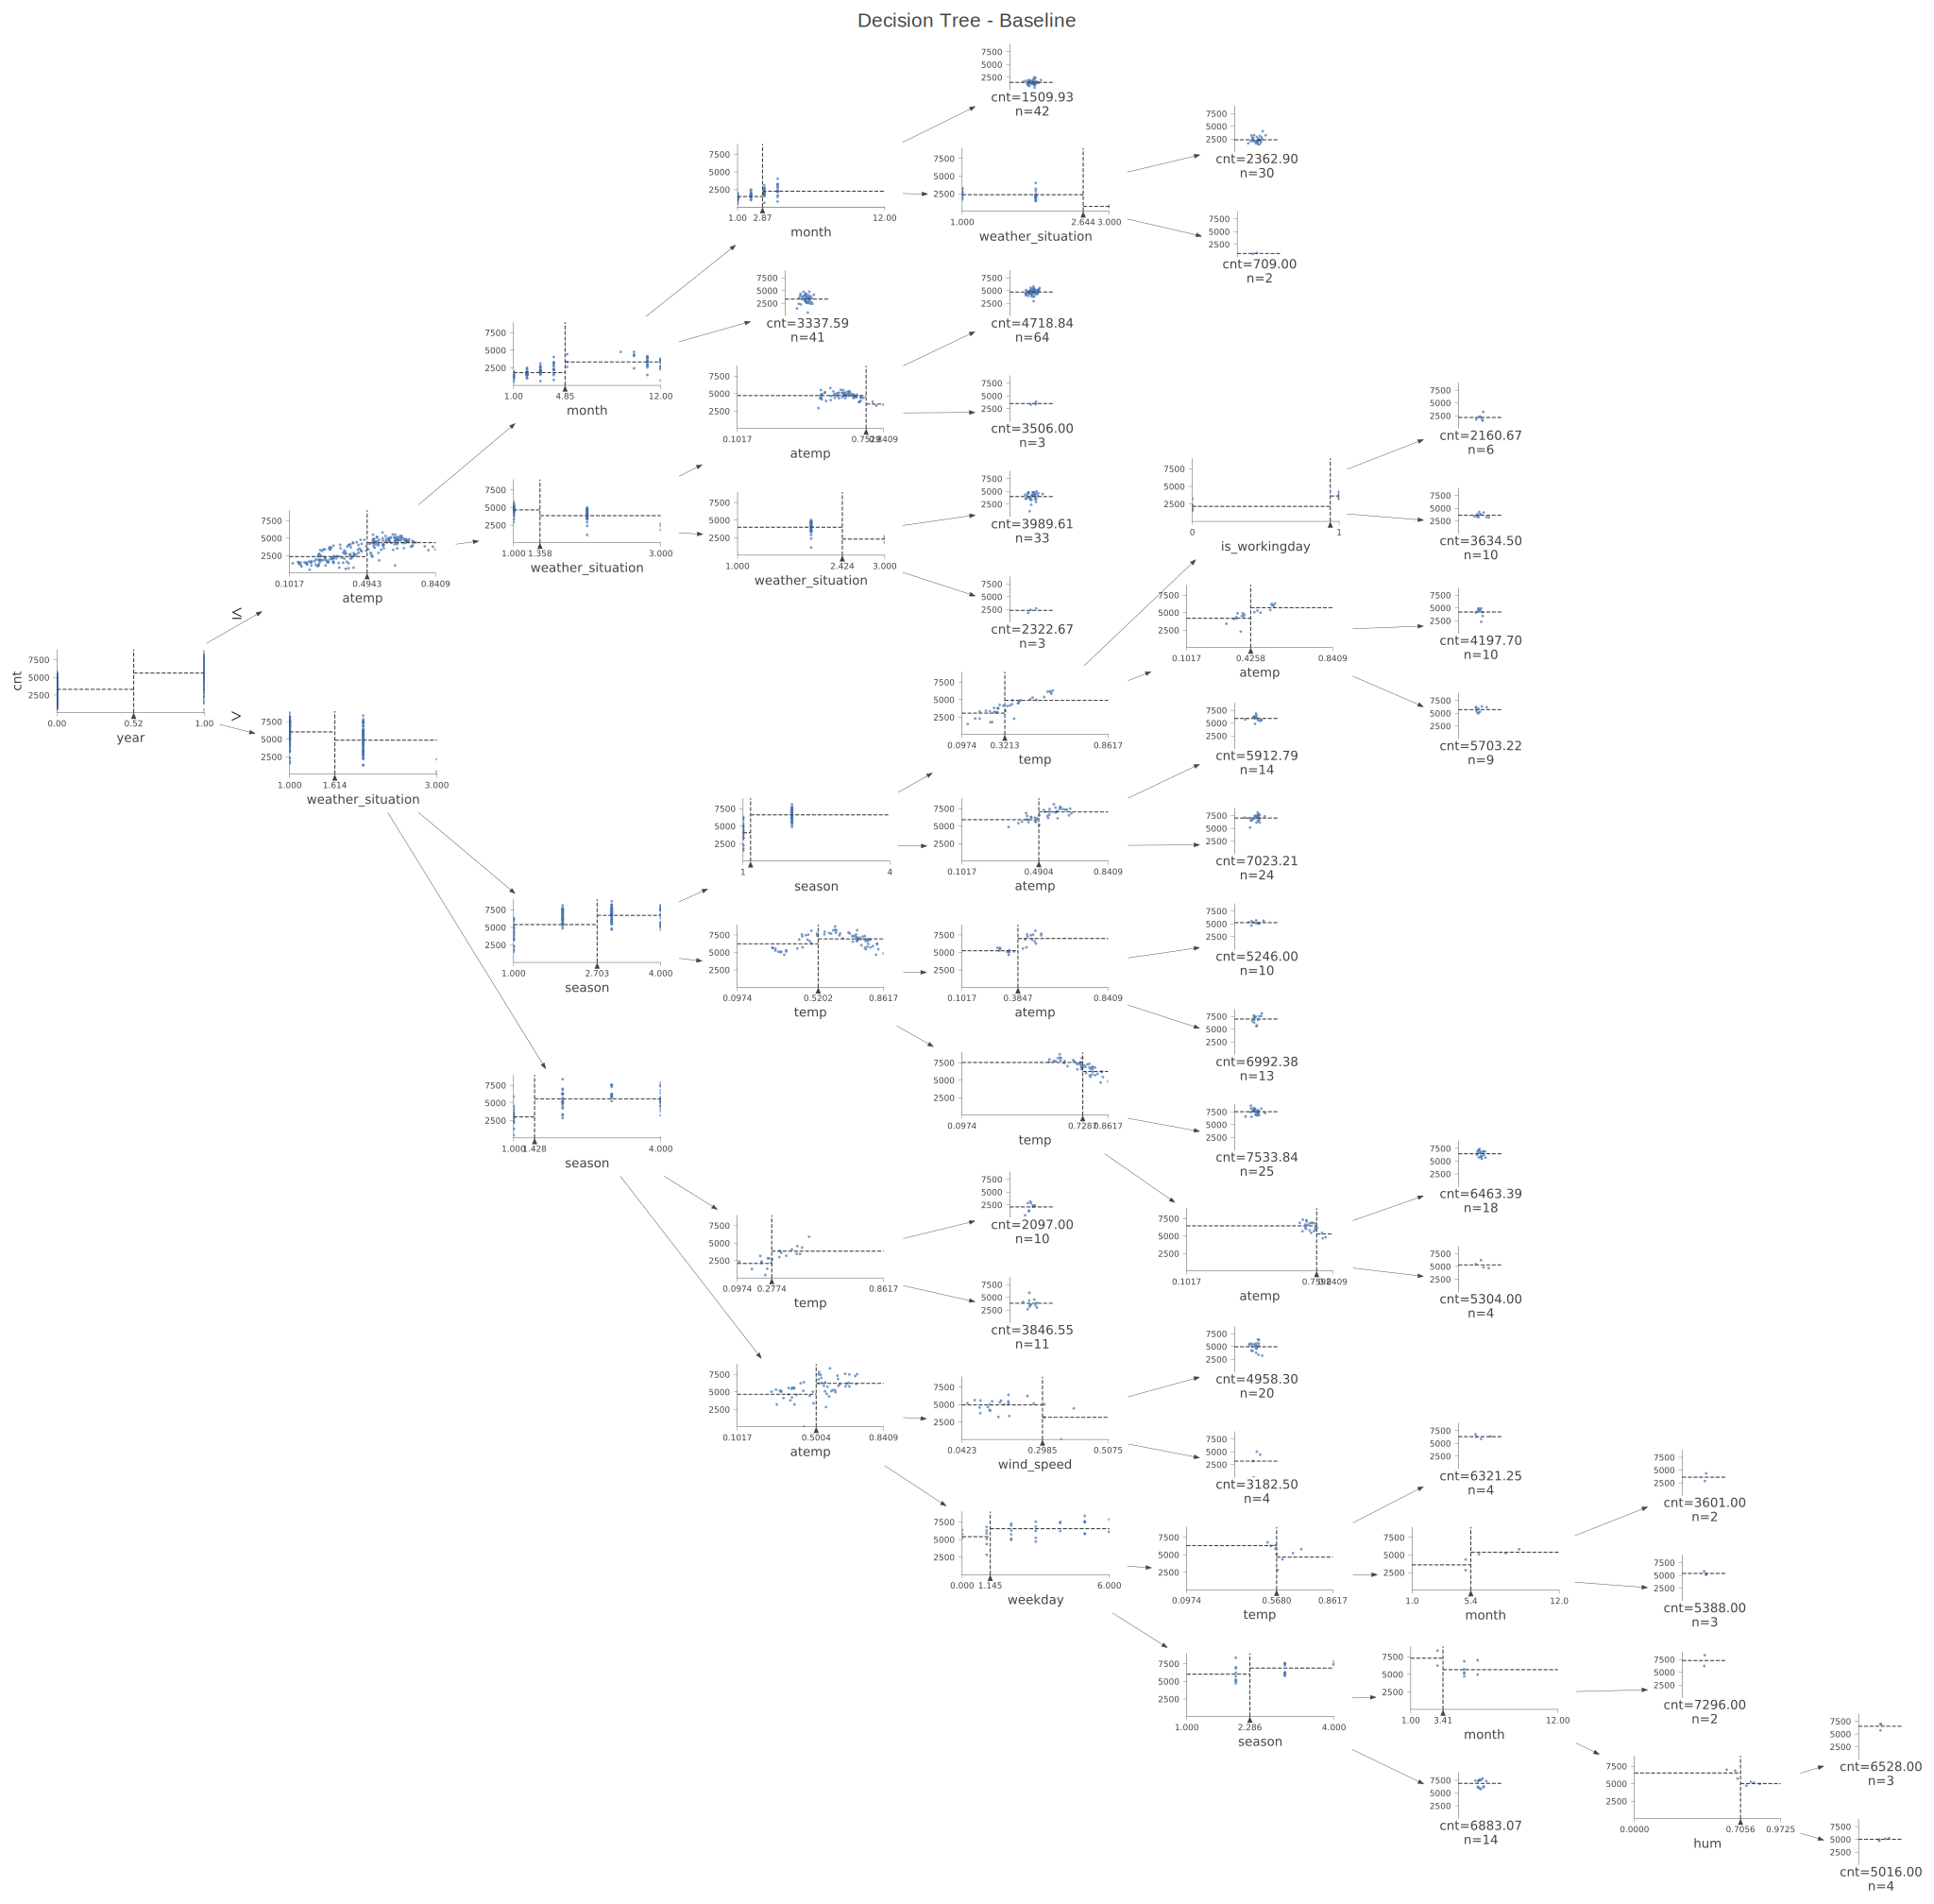

In [ ]:
dtreeviz(dt_gs.best_estimator_, scale=1.5, x_data=X_train, y_data=y_train, target_name='cnt',
         feature_names=X_train.columns, title="Decision Tree - Baseline", orientation='LR')

En el gráfico podemos ver como el atributo *year* parece ser el primero a la hora de cribar la predicción de un individuo. Dependiendo del valor de este, se seguirá decidiendo su resultado en función los otros atributos *atemp* (si *year* es mayor igual a 0.52) o *weather_situation* (si *year* es menor a 0.52). A medida que los individuos vayan acotando sus resultados podemos ver que se obtienen distintos resultados de *cnt* en función de las características del propio individuo.

Vamos a representar también las predicciones del árbol contra los valores reales.

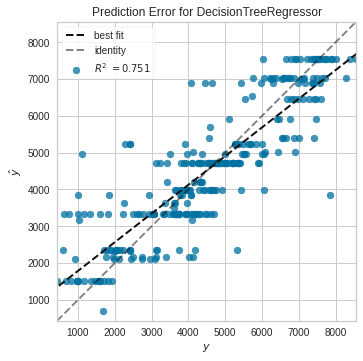

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(dt_gs.best_estimator_, X_train, y_train, X_test, y_test)

Como podemos ver el comportamiento que siguen las representaciones del conjunto de test con este modelo son algo anómalas. La posible causa de esto, es que el árbol de regresión está haciendo predicciones constantes para ciertos grupos de individuos, esto puede deberse a que el modelo no tiene suficiente capacidad para modelar la variabilidad en los datos. El valor de $R^2$ que hemos obtenido es 0.751, este valor define, en palabras sencillas, que tan bien los datos se ajustan el modelo que en nuestro caso es un ajuste moderadamente bueno.

# Apartado c

Vamos a ajustar un regresor con random forest y un regresor con gradient boosting a los datos explorando sus hiperparámetros adecuadamente. Registraremos la puntuación de la validación cruzada para los mejores modelos y su calidad con los datos de test.

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param = {'n_estimators': [5, 10, 25, 40, 50, 75, 100, 200], 
         'criterion':['mse', 'entropy'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1, 2, 3, 5, 10]}

rf =  RandomForestRegressor(random_state=1)
rf_gs =  GridSearchCV(rf,param, cv=cv, n_jobs=-1)
rf_gs.fit(X_train, y_train);

In [ ]:
show_html(pd.DataFrame(rf_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
7,"{'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}",0.876,1
327,"{'criterion': 'mse', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}",0.876,2
6,"{'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}",0.876,3
5,"{'criterion': 'mse', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 75}",0.875,4
287,"{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}",0.875,5


Podemos ver como los resultados son bastante buenos, y es notable que apenas hay diferencia entre los primeros 5 resultados, el mejor de estos tiene un acierto de 0.876. El mejor de estos lo hemos obtenido con *mse* para el valor de *criterion*, con el *max_depth* definido a *None*, el *min_samples_leaf* igual 1 y siendo el número de estimadores 200.

In [ ]:
results_df = save_results(rf_gs, 'Random forest', X_test, y_test, results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Random forest,0.861,0.876
Regression tree,0.751,0.818


Podemos ver como el nuevo modelo entrenado, basado en random forest, es bastante mejor que el que habíamos visto en el apartado anterior. Tanto en en la calidad del modelo con los datos del test como con la puntuación de la validación cruzada. La mejora que presenta este nuevo modelo es considerablemente buena, más de un 0.1 en el ratio de acierto del conjunto test.

Vamos a ver ahora el peso de relevancia que da este modelo a cada uno de los atributos que existen en el conjunto de datos a través de l a función de *permutation_importance* de la librería de scikit-learn.

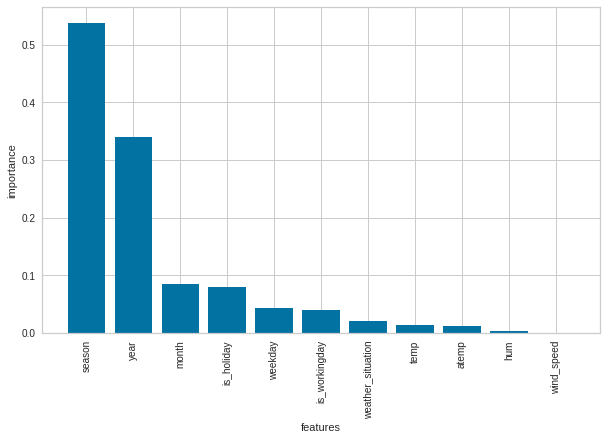

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_gs, X_test, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

Claramente los dos atributos que más definen las predicciones realizadas por el modelo, son *season* y *year*. El parámetro *year*, si nos fijamos en el apartado anterior, podemos ver como era el primer nivel de distinción que aparecía en el árbol de regresión. El atributo *season*, por otro lado, también aparecía en los primeros niveles del árbol, aunque por detrás de algunos otros atributos.

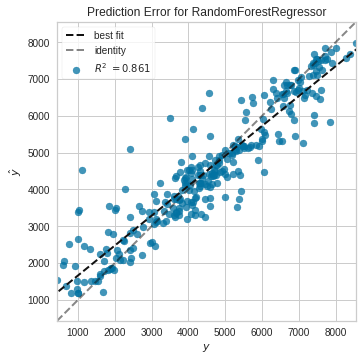

In [ ]:
visualizer = prediction_error(rf_gs.best_estimator_, X_train, y_train, X_test, y_test)

Podemos ver claramente que con este modelo la representación de las predicciones sobre el conjunto test ya no tiene ningún tipo de comportamiento anómalo. Esto es debido a que los random forest combinan diversos árboles de decisión y estos suelen tener un rendimiento más consistente y son menos propensos al sobreajuste.De ahí que no prediga como iguales un cierto grupo de individuos que en realidad son distintos.

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

param = {
    'n_estimators': (10, 1000),
    'max_depth': (1, 10),
    'learning_rate': (0.01, 1.0),
    'loss': ['ls', 'lad', 'huber']
}

gbr = GradientBoostingRegressor()
gbr_gs = GridSearchCV(gbr, param)
gbr_gs.fit(X_train, y_train)

In [ ]:
show_html(pd.DataFrame(gbr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
7,"{'learning_rate': 0.01, 'loss': 'lad', 'max_depth': 10, 'n_estimators': 1000}",0.889,1
17,"{'learning_rate': 1.0, 'loss': 'lad', 'max_depth': 1, 'n_estimators': 1000}",0.851,2
1,"{'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'n_estimators': 1000}",0.837,3
9,"{'learning_rate': 0.01, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 1000}",0.831,4
21,"{'learning_rate': 1.0, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 1000}",0.826,5


Podemos ver como los resultados son bastante buenos, y existe cierta diferencia entre los primeros 5 resultados, el mejor de estos tiene un acierto de 0.888. El mejor de estos lo hemos obtenido con una tasa de aprendizaje igual a 0.01, *lad* para el valor de *loss*, con el *max_depth* definido 10 y el número de estimadores igual a 1000.

In [ ]:
results_df = save_results(gbr_gs, 'Gradient boosting', X_test, y_test, results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Gradient boosting,0.869,0.889
Random forest,0.861,0.876
Regression tree,0.751,0.818


Podemos ver que este nuevo modelo mejora incluso más el que habíamos visto con random forest, aunque está mejora tampoco es exageradamente grande. Tanto el acierto sobre el conjunto de datos de test como la puntuación de validación cruzada han aumentado, aproximadamente, un 0.01 respecto al segundo mejor modelo visto en el notebook.

Vamos a ver ahora el peso de relevancia que da este modelo a cada uno de los atributos que existen en el conjunto de datos a través de la función de *permutation_importance* de la librería de scikit-learn.

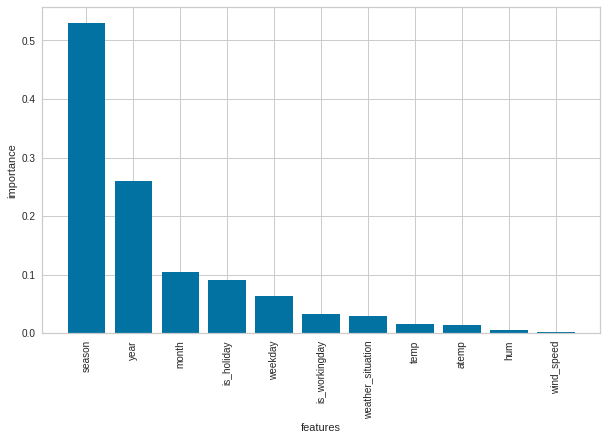

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gbr_gs, X_test, y_test, n_repeats=10, random_state=1, n_jobs=-1)

feature_names = X_test.columns
importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

La importancia que le da este modelo a los distintos atributos de nuestros datos es prácticamente idéntico al que veíamos con el modelo de random forest. Parece ser que los parámetros que más definen una salida, son el *season* y el *year*. Los otros, siguen teniendo algo de importancia pero está es mucho menor.

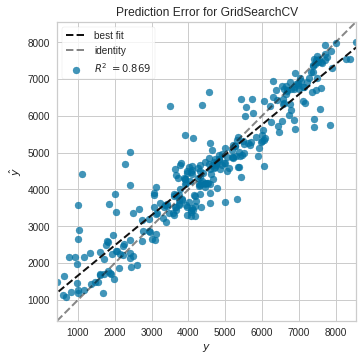

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(gbr_gs, X_train, y_train, X_test, y_test)

Podemos ver como también con este modelo no tenemos el raro comportamiento que teníamos con el regression tree. Este nuevo modelo entrenado, tiene la ventaja de combinar la salida de muchos árboles de decisión de manera secuencial, lo que permite que el modelo capture relaciones más complejas y, por tanto, predicciones más suaves y contínuas.

# Apartado d

Vamos a ajustar una máquina de vectores de soporte (SVM) para regresión usando un kernel RBF, normalizaremos adecuadamente los datos para este modelo. Explorarenis los hiperparámetros del modelo adecuadamente. Al igual que con los otros modelos, registraremos la puntuación de la validación cruzada para el mejor modelo y su calidad con los datos del test.

In [ ]:
from sklearn import preprocessing

mms = preprocessing.MinMaxScaler()

X_train_norm = mms.fit_transform(X_train.reset_index(drop=True))
X_test_norm = mms.fit_transform(X_test)
y_train_n = y_train.reset_index(drop=True)
y_test_n = y_test.reset_index(drop=True)

In [ ]:
param = {
    'C': 10**np.linspace(-3,3,101), 
    'gamma': ['scale','auto'], 
    'epsilon': np.linspace(0,0.01,11)
}

rbsvr =  SVR(kernel='rbf', max_iter=25000, cache_size=2000)
rbsvr_gs = GridSearchCV(rbsvr, param)
rbsvr_gs.fit(X_train_norm, y_train_n);

In [ ]:
show_html(pd.DataFrame(rbsvr_gs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2220,"{'C': 1000.0, 'epsilon': 0.01, 'gamma': 'scale'}",0.866,1
2218,"{'C': 1000.0, 'epsilon': 0.009000000000000001, 'gamma': 'scale'}",0.866,2
2216,"{'C': 1000.0, 'epsilon': 0.008, 'gamma': 'scale'}",0.866,3
2214,"{'C': 1000.0, 'epsilon': 0.007, 'gamma': 'scale'}",0.866,4
2212,"{'C': 1000.0, 'epsilon': 0.006, 'gamma': 'scale'}",0.866,5


Podemos ver como los resultados son bastante buenos y parecidos a los vistos hasta ahora, y no existe cierta diferencia alguna entre los primeros 5 resultados, los cuales tienen un acierto de 0.866. El mejor de estos lo hemos obtenido con una *C* igual a 1000, una *epsilon* igual a 0.01 y *scale* como valor de *gamma*.

In [ ]:
results_df = save_results(rbsvr_gs, 'SVM Kernel RBF', X_test_norm, y_test_n, results_df)
results_df.sort_values(by='test_score', ascending=False)

,test_score,cross_val_score
Gradient boosting,0.869,0.889
Random forest,0.861,0.876
SVM Kernel RBF,0.826,0.866
Regression tree,0.751,0.818


Por lo que podemos ver, da resultados parecidos a los modelos aplicados anteriormente, aunque algo peores, este modelo no ha significado una mejora para los modelos ya vistos. A pesar de que los nuevos resultados obtenidos son buenos, no lo son suficiente como para usar este como modelo final.



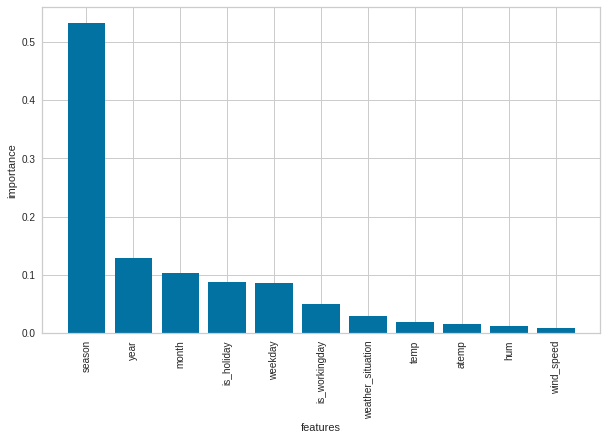

In [ ]:
result = permutation_importance(rbsvr_gs, X_test_norm, y_test_n, n_repeats=10, random_state=1, n_jobs=-1)


importances = np.sort(result['importances_mean'])[::-1]

plt.figure(figsize=(10,6));
plt.bar(feature_names, importances);
plt.xlabel('features');
plt.ylabel('importance');
plt.xticks(rotation=90);
plt.show();

La importancia que le da este modelo a los distintos atributos de nuestro conjunto de datos es bastante similar al resto de modelos. Podemos ver como claramente el atributo *season* destaca sobre todo el resto. Una pequeña diferencia que exsite es que se la ha quitado un poco de peso a los atributos *year* y *month*, este peso, por lo que vemos  en la gráfica ha sido repartido entre el resto de atributos.

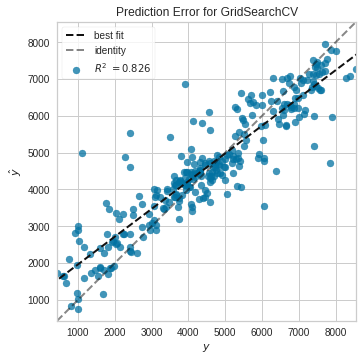

In [ ]:
visualizer = prediction_error(rbsvr_gs, X_train_norm, y_train_n, X_test_norm, y_test_n)

Podemos ver como también con este modelo no tenemos el raro comportamiento que teníamos con el regression tree. Este nuevo modelo, en cambio, obtienen predicciones más suaves y contínuas, aunque algo más desviadas que otros de los modelos vistos.

# Conclusión

Viendo los resultados unicamente, la decisión respecto al mejor modelo es clara. El modelo que utiliza gradient boosting nos proporciona el mejor resultado de todos los vistos, con un acierto sobre el conjunto test de 0.869. Eso sí, este aspecto no es el único a tener en cuenta, otras características como el coste computacional a la hora de hacer predicciones también tienen que ser tenidas en cuenta.

El gradient boosting suele ser más costoso computacionalmente que los random forest (el segundo mejor modelo obtenido), este es debido a que los random forest entrenan todos los árboles en paralelo y el gradient boosting de forma secuencial. Por otro lado, los modelos que utilizan gradient boosting, suelen ser más profundos y complejos, este puede aumentar también el coste computacional cuando se hacen predicciones.

La diferencia entre ambos modelos en el acierto sobre el conjunto test es de 0.008, es por esto, que quizá en este caso, donde el acierto no es tan profundamente vital (como podría ser unos datos relacionados con la medicina) valdría la pena utilizar el modelo de random forest para mejorar el coste computacional de las predicciones.